#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 5. ПРОСТОРОВА ФІЛЬТРАЦІЯ

In [2]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [13]:
## Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'lenna.png'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

## Перетоворення в формат np.float32
test_im_flt = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
test_im_flt[:,:,:] = np.float32(test_im[:,:,:])/bins_flt


IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


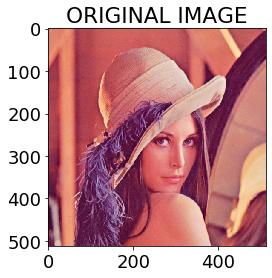

In [14]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im_flt)
plt.show()

##  ПОСИЛЕННЯ РІЗКОСТІ
##  ОПЕРАТОР ЗГОРТКИ ЛАПЛАСА

MASK SHAPE (3, 3, 1) MASK SIZE 9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


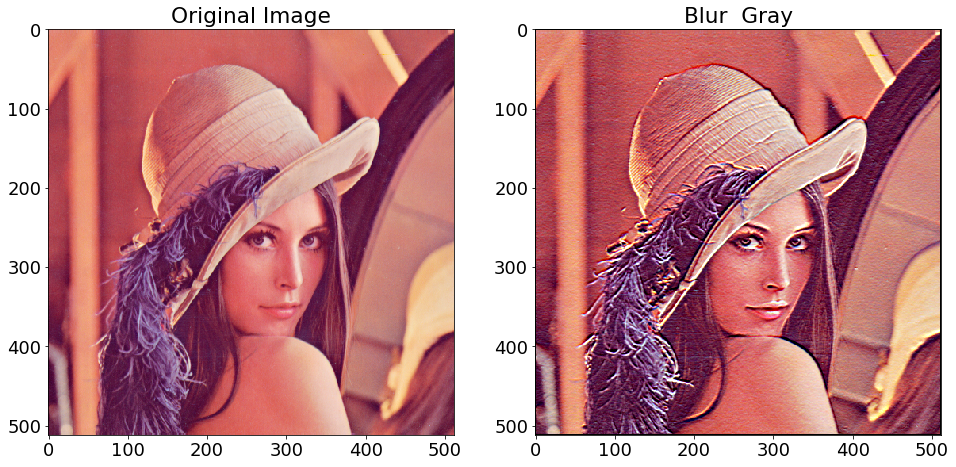

In [42]:
## Визначення маски фильтру підвищення різкості
mask_row = 3
mask_clm = 3
mask_sharp = np.zeros ( (mask_row, mask_clm, 1), dtype = np.float32)
print ('MASK SHAPE', mask_sharp.shape, 'MASK SIZE', mask_row*mask_clm)
b = 2.0
Q = 1.0 + 4*b
q = -b

mask_sharp[0,0] = mask_sharp[0,2] = 0.0
mask_sharp[2,0] = mask_sharp[2,2] = 0.0
mask_sharp[1,0] = mask_sharp[1,2] = q 
mask_sharp[0,1] = mask_sharp[2,1] = q 
mask_sharp[1,1] = Q

# print('FILTER MASK')
# print(mask_sharp[:,:])

## Визначення файлу перетворенного зображення
filtr_im_ = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)
image_out = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)

pixel = np.zeros(3, dtype=np.float32)
rows = rows_num
clms = clms_num
##rows = 20
##clms = 20
for i in  range (1, (rows -1), 1):
    for j in  range (1, (clms-1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                pixel += mask_sharp[l,k]*test_im_flt [i-(1-l), j-(1-k), : ]
                ## print (i, j, l, k, test_im [i-(1-k), j-(1-l), : ], pixel)                        
        filtr_im_ [i, j, :] = pixel [:]
        #print (i, j, test_im [i, j, : ], pixel[:], filtr_im_ [i, j, :])                        

## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_)
ax[1].set_title("Blur  Gray")
plt.show()

## РОБОТА З НАПІВТОНОВИМ ЗОБРАЖЕННЯМ

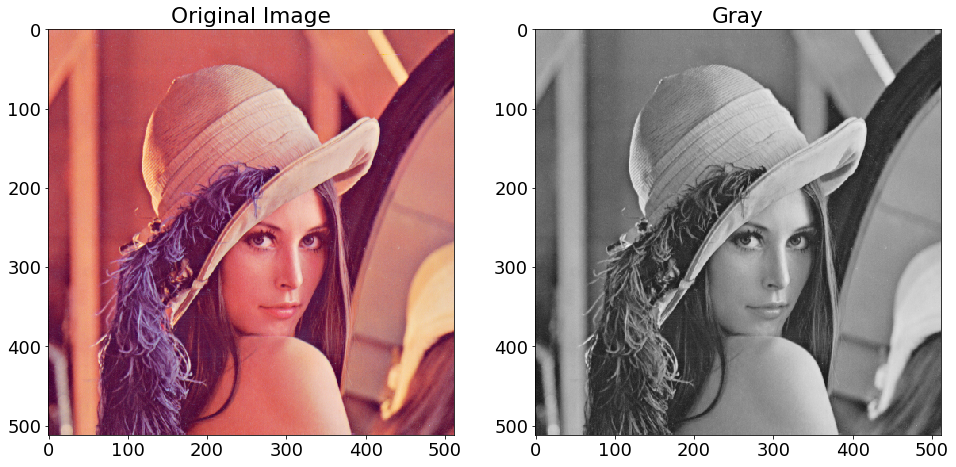

In [43]:
## ВИЗНАЧЕННЯ МАСИВУ ДЛЯ НАПІСІРОГО ОРИГІНАЛЬНОГО ЗОБРАЖЕННЯ
test_im_gray = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)

## ФОМУВАННЯ НАПІСІРОГО ОРИГІНАЛЬНОГО ЗОБРАЖЕННЯ
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        test_im_gray [i, j, :] = 0.299*test_im_flt[i, j, 0]+0.587*test_im_flt[i, j, 1]+0.114*test_im_flt[ i, j, 2]
                
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_flt)
ax[0].set_title("Original Image")
ax[1].imshow(test_im_gray)
ax[1].set_title("Gray")
plt.show()


#### ПІДВИЩУЄМО РІЗКІСТЬ НАПІВТОНОВОГО ЗОБРАЖЕННЯ

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


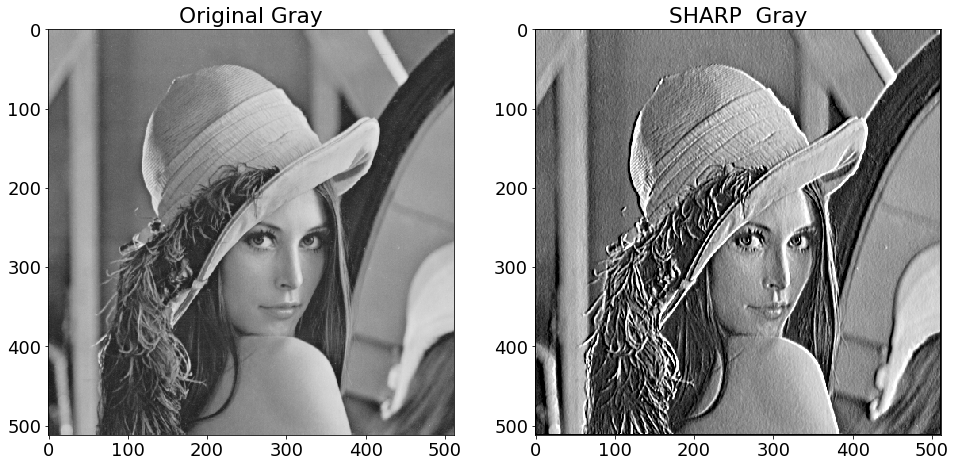

In [44]:
filtr_im_gray = np.zeros ( (rows_num, clms_num, 3), dtype = np.float32)

for i in  range (1, (rows -1), 1):
    for j in  range (1, (clms-1), 1):
        pixel[:] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                pixel += mask_sharp[l,k]*test_im_gray [i-(1-k), j-(1-l), : ]
            filtr_im_gray [i, j, :] = pixel [:]
        
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_gray)
ax[0].set_title("Original Gray")
ax[1].imshow(filtr_im_gray)
ax[1].set_title('SHARP  Gray')
plt.show()

## ПОРІВНЯННЯ ГИСТОГРАММ

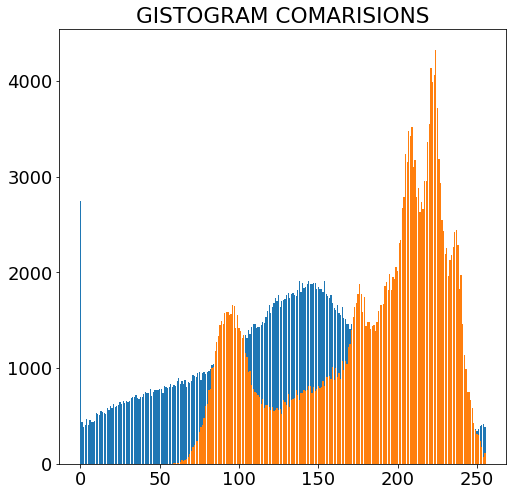

In [37]:
## Визначення масиву для гістограми РЗМИТОГО ЗОБРАЖЕННЯ
L_gisto_orig = np.zeros ( (bins), dtype=np.uint32)
L_gisto_transf = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_orig[np.uint8(test_im_flt[i, j, 0]*256)] += 1 
        L_gisto_transf [np.uint8(filtr_im_gray[i, j, 0]*256)] += 1 
        
## ПОРІВНЯННЯ ГІСТОГРАМИ
pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(8,8))
plt.title('GISTOGRAM COMARISIONS')
ax.bar(pix_index, L_gisto_transf)
ax.bar(pix_index, L_gisto_orig)
plt.show()
